# Artificial Intelligence Mastery Week 1 Challenge

## Loading Modules

In [1]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [2]:
import utils as ut
import plot as pt
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import warnings 
from joblib import Parallel, delayed
from sklearn.feature_extraction.text import CountVectorizer

warnings.filterwarnings("ignore")

c:\Users\BAB AL SAFA\Documents\Vani\Kifiya-10-academy\k-week-1\scripts\utils.py:24: SyntaxWarning: invalid escape sequence '\w'
  domain = re.search("@[\w.]+", email)


## Loading Data

In [3]:
all_data_path = 'data/raw_analyst_ratings.csv'
df = ut.read_csv_file(all_data_path)

In [4]:
df = df.get("data")
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


PLOT

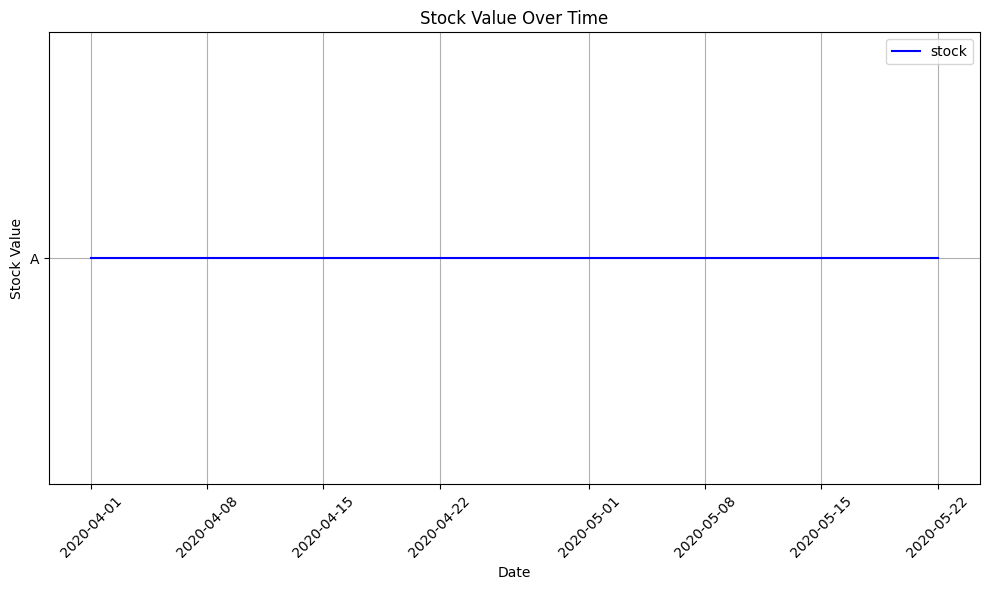

In [5]:
temp = df.head(30)
pt.plot_stock_data(temp, date_column='date', stock_value_column='stock')

## EDA

### Descriptive Statistics

In [6]:
# Obtain basic statistics for textual lengths (like headline length).

df['headline_chr_length'] = df['headline'].apply(lambda x: len(x))
df['headline_word_length'] = df['headline'].apply(lambda x: len(x.split()))

# summary statistics
display(
    "Summary statistics for headline character and word lengths",
    df[['headline_chr_length', 'headline_word_length']].describe().astype(int)
)

'Summary statistics for headline character and word lengths'

,headline_chr_length,headline_word_length
count,1407328,1407328
mean,73,11
std,40,6
min,3,1
25%,47,7
50%,64,10
75%,87,13
max,512,77


The headlines could go up to 512 charcter length and 77 word length. The minimum is 3 characters and 1 word.

In [7]:
# lets check the extreme values

display(
    "Headline with maximum character length",
    df.loc[df['headline_chr_length'].idxmax(), 'headline'],

    "Headline with maximum word length",
    df.loc[df['headline_word_length'].idxmax(), 'headline'],

    "Headline with minimum character length",
    df.loc[df['headline_chr_length'].idxmin(), 'headline'],

    "Headline with minimum word length",
    df.loc[df['headline_word_length'].idxmin(), 'headline']
)

'Headline with maximum character length'

'JinkoSolar Tiger Pro Series Receives World\'s First IEC 61701 Ed. 3 (FDIS) Certification for Salt Mist Corrosion Standards JinkoSolar Holding Co., Ltd. (the "Company," or "JinkoSolar") (NYSE:JKS), one of the largest and most innovative solar module manufacturers in the world, today announced that its innovative Tiger Pro Series of high-efficiency modules received the world\'s first IEC 61701 Ed. 3 (FDIS) certification for salt mist corrosion test issued by TÜV Nord AG, an independent provider of technical ser'

'Headline with maximum word length'

'JinkoSolar Tiger Pro Series Receives World\'s First IEC 61701 Ed. 3 (FDIS) Certification for Salt Mist Corrosion Standards JinkoSolar Holding Co., Ltd. (the "Company," or "JinkoSolar") (NYSE:JKS), one of the largest and most innovative solar module manufacturers in the world, today announced that its innovative Tiger Pro Series of high-efficiency modules received the world\'s first IEC 61701 Ed. 3 (FDIS) certification for salt mist corrosion test issued by TÜV Nord AG, an independent provider of technical ser'

'Headline with minimum character length'

'SPY'

'Headline with minimum word length'

'Accenture'

In [8]:
# Count the number of articles per publisher to identify which publishers are most active.

publisher_counts = df['publisher'].value_counts()
publisher_counts = publisher_counts.reset_index()

publisher_counts.columns = ['publisher', 'article_count']

display(
    "Total number of publishers",
    len(publisher_counts),

    "Publisher with most articles",
    publisher_counts.head(10),
    "Publisher with least articles",
    publisher_counts.tail(10)
)   

'Total number of publishers'

1034

'Publisher with most articles'

,publisher,article_count
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
5,Eddie Staley,57254
6,Hal Lindon,49047
7,ETF Professor,28489
8,Juan Lopez,28438
9,Benzinga Staff,28114


'Publisher with least articles'

,publisher,article_count
1024,Goatmug Blog,1
1025,Christian Fromhertz,1
1026,swenstock,1
1027,BuyAndHoldPlus,1
1028,Brett's Stock Market Pulse,1
1029,MoneyGeek,1
1030,muathe,1
1031,Robert Morris,1
1032,LeftCoastHedgie,1
1033,Jeremie Capron,1


There are 1034 publishers and Paul Quintaro, Lisa Levin, Benzinga Newsdesk are the most active(frequent) authors.

In [9]:
# Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.

x = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
x[~x.isna()] = x[~x.isna()].dt.tz_localize(None)
x.fillna(pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce'), inplace=True)

df['date'] = x

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Count the number of articles per year and month
year_counts = df['year'].value_counts().reset_index()
year_counts.columns = ['year', 'article_count']

month_counts = df['month'].value_counts().reset_index()
month_counts.columns = ['month', 'article_count']

display(
    "Number of articles per year",
    year_counts,

    "Number of articles per month",
    month_counts
)

'Number of articles per year'

,year,article_count
0,2019,150380
1,2018,146924
2,2016,141892
3,2015,135295
4,2014,134859
5,2011,131322
6,2017,124456
7,2012,122655
8,2013,121523
9,2020,105214


'Number of articles per month'

,month,article_count
0,5,130339
1,10,124800
2,8,124042
3,2,122835
4,3,121948
5,4,121815
6,1,121541
7,11,121431
8,7,110762
9,6,106600


The articles were being published from 2011 to 2020 where 150,380 artices were published in 2019. The 5th month of the year is the most active month for publishing articles. It has 130,339 publications throughout the years.

In [10]:
# Looking for particular days or during specific events where the news frequency is high

df['day'] = df['date'].dt.day
day_cols = ['year', 'month', 'day']

df.groupby(day_cols).size().reset_index(name='article_count').sort_values('article_count', ascending=False).head(10)

,year,month,day,article_count
3863,2020,3,12,2739
3850,2020,2,28,1620
3870,2020,3,19,1594
3849,2020,2,27,1567
3857,2020,3,6,1428
3919,2020,5,7,1396
3874,2020,3,23,1390
3911,2020,4,29,1389
3862,2020,3,11,1384
3912,2020,4,30,1327


The highest number of articles were published on 2020-03-12 with 2,739 articles.

### Text Analysis(Sentiment analysis & Topic Modeling):


In [11]:
# Perform sentiment analysis on headlines to gauge the sentiment (positive, negative, neutral) associated with the news.

results = Parallel(n_jobs=-1)(
    delayed(ut.get_sentiment)(text) for text in df['headline']
)

df['sentiment'] = results

# classify sentiment into positive, negative, and neutral
df['sentiment_class'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

sentiment_counts = df['sentiment_class'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment_class', 'article_count']

display(
    "Sentiment counts",
    sentiment_counts
)

'Sentiment counts'

,sentiment_class,article_count
0,neutral,934928
1,positive,341161
2,negative,131239


In [12]:
df

,headline,url,publisher,date,stock,headline_chr_length,headline_word_length,year,month,day,sentiment,sentiment_class
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54,A,39,7,2020,6,5,0.00,neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20,A,42,7,2020,6,3,0.00,neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07,A,29,5,2020,5,26,0.00,neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06,A,44,7,2020,5,22,0.00,neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59,A,87,14,2020,5,22,0.00,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,38,7,2011,8,29,0.15,positive
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,52,7,2011,6,22,0.15,positive
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,56,8,2011,6,21,0.00,neutral
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,54,8,2011,6,21,0.00,neutral


In [13]:
# Use natural language processing to identify common keywords or phrases, potentially extracting topics or significant events (like "FDA approval", "price target", etc.).

cv = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=50)

word_freq_matrix = cv.fit_transform(df['headline'])

word_freq = word_freq_matrix.sum(axis=0)

word_freq_df = pd.DataFrame({
    'word': cv.get_feature_names_out(),  
    'frequency': word_freq.A1          
})

word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

display(
    "Top 50 bigrams",
    word_freq_df
)


'Top 50 bigrams'

,word,frequency
1,52 week,51006
27,price target,47274
41,stocks moving,40044
20,mid day,37324
19,market update,33101
9,earnings scheduled,32055
15,initiates coverage,28993
26,pre market,28393
33,raises pt,27213
6,companies trading,23170


The headlines focus on analyst actions (e.g., price targets), market movements (e.g., stocks moving, 52-week highs/lows), and earnings updates, emphasizing timely and impactful events that influence investor decisions.

#### Time Series Analysis

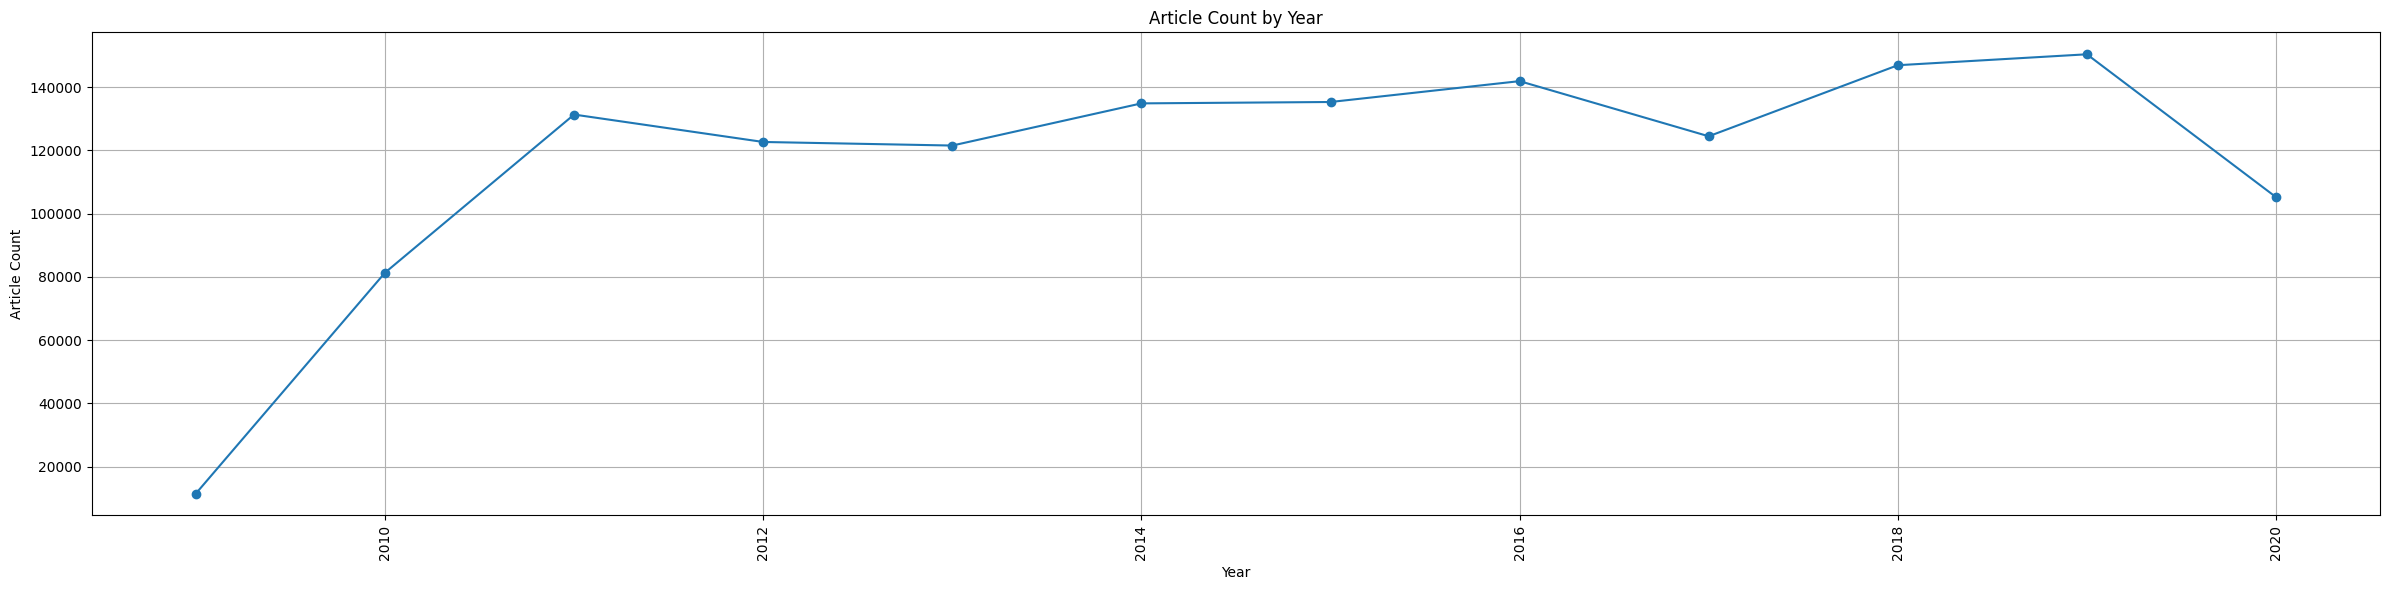

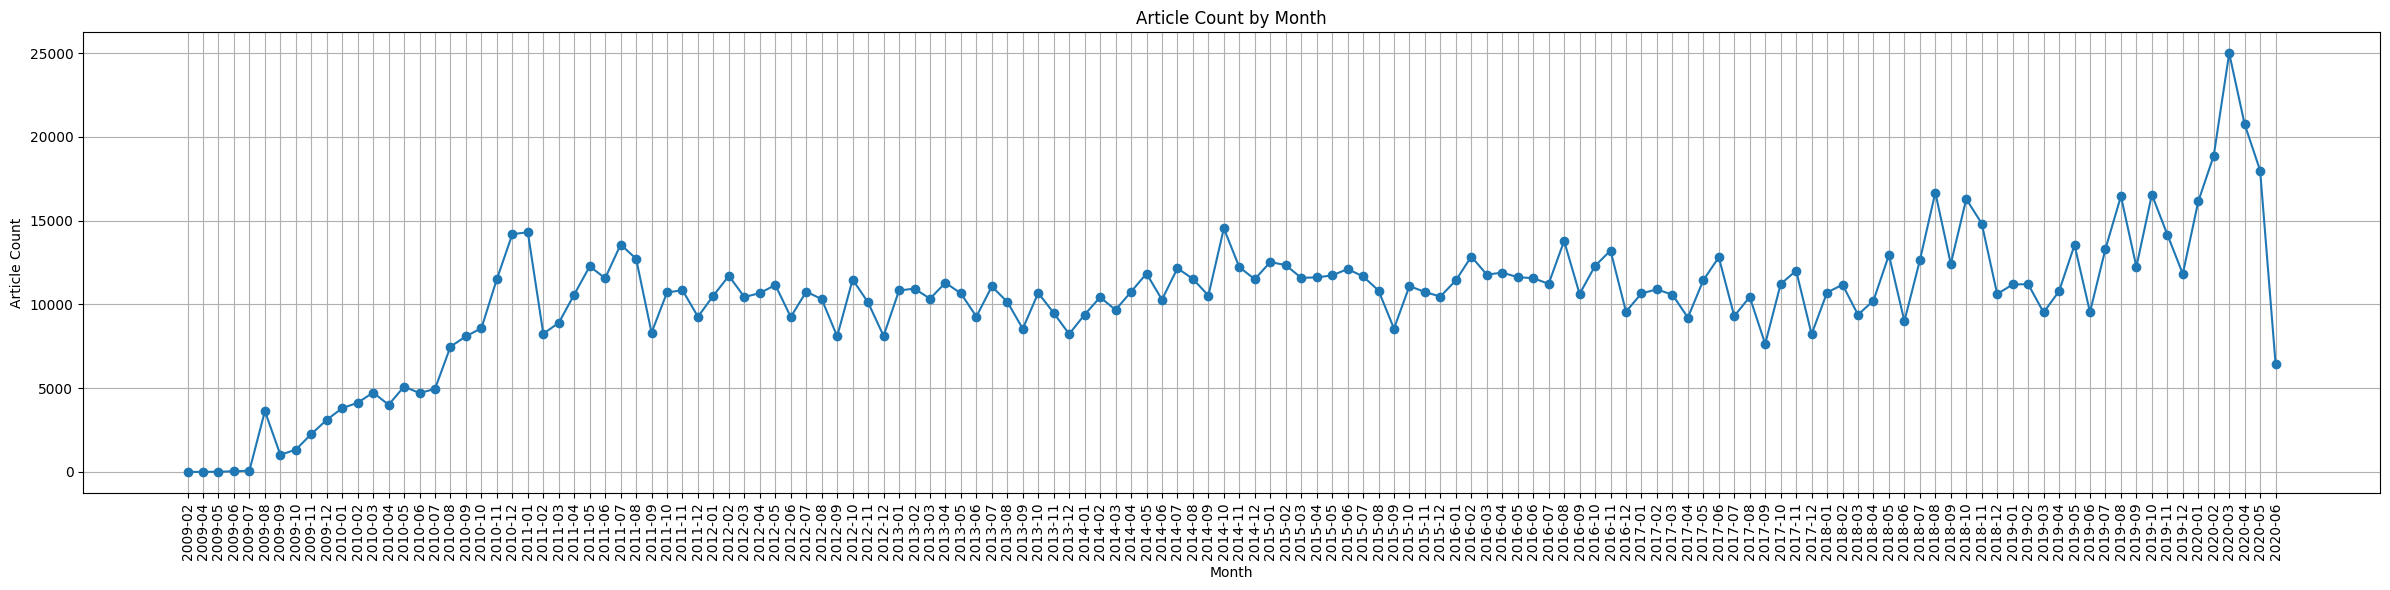

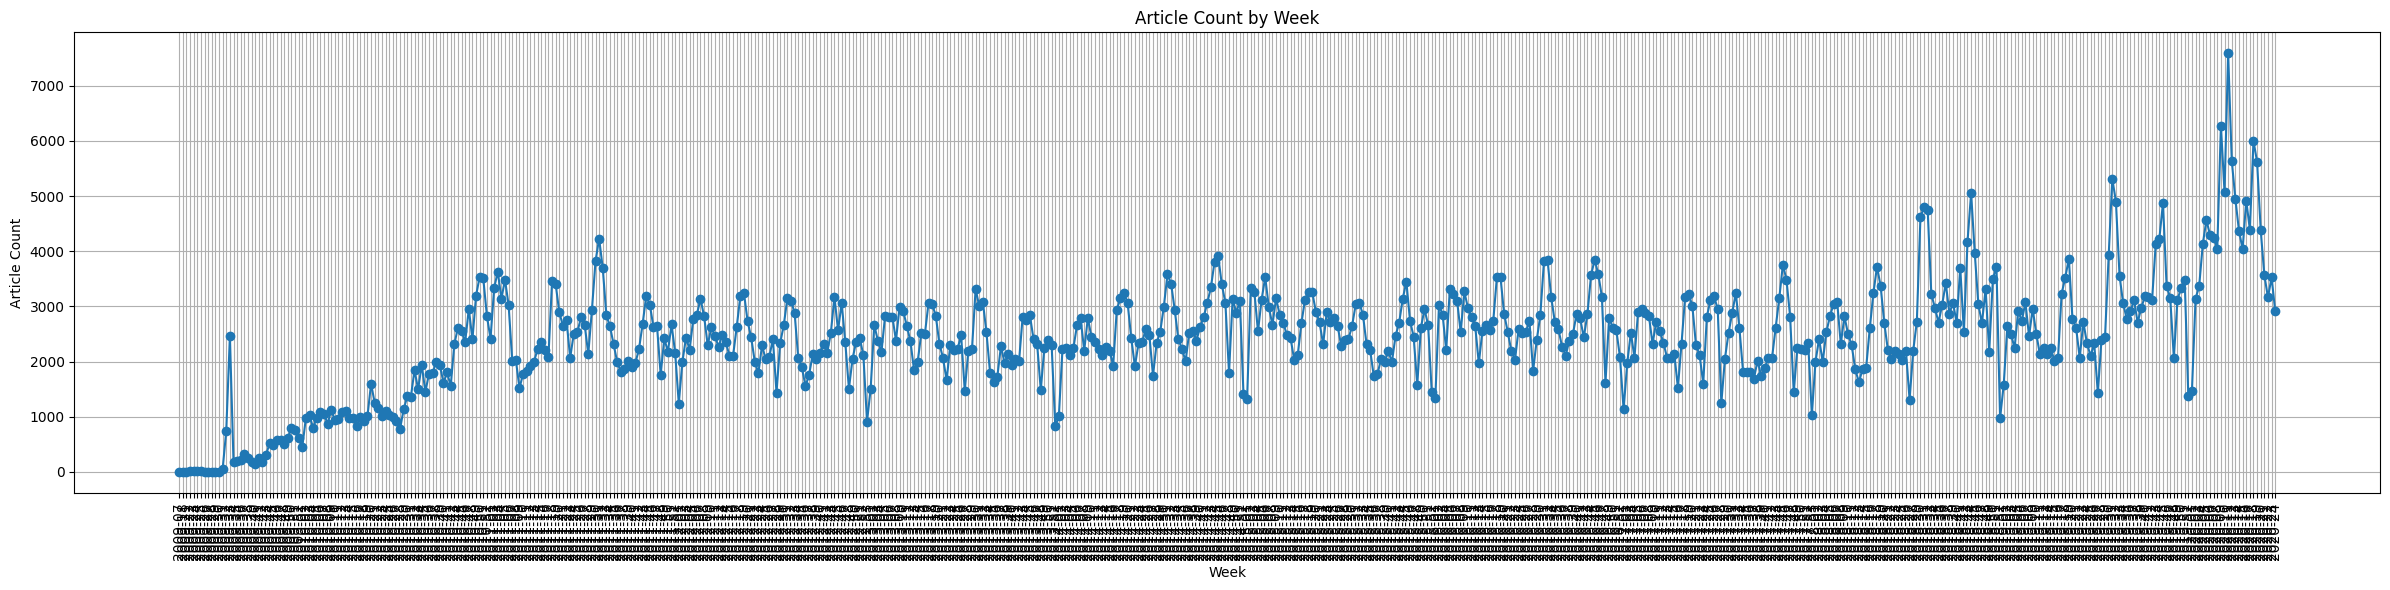

In [14]:
# Time series plots
pt.plot_time_series(df, 'year', 'Article Count by Year', 'Year')
pt.plot_time_series(df, 'month', 'Article Count by Month', 'Month')
pt.plot_time_series(df, 'week', 'Article Count by Week', 'Week')


On the second month of 2020, there was a clear spark indicating that there was a significant event that happened on that month. The number of articles published on that month was more than 7000 which is the highest number of articles published in a single month.

In [15]:
# Analysis of publishing times might reveal if there’s a specific time when most news is released, which could be crucial for traders and automated trading systems.

df['hour'] = df['date'].dt.hour

hour_counts = df['hour'].value_counts().reset_index()
hour_counts.columns = ['hour', 'article_count']

display(
    "Number of articles per hour",
    hour_counts
)

'Number of articles per hour'

,hour,article_count
0,0,1351408
1,10,7669
2,9,5965
3,12,5732
4,11,5701
5,8,5527
6,7,5033
7,16,3939
8,17,2800
9,13,2710


The majority of articles are published at hour 0 (midnight), which is likely due to missing or unspecified timestamps defaulting to 00:00:00. Excluding this anomaly, the highest article counts occur between 8 AM and 12 PM, aligning with key trading hours when market news is most relevant for investors and traders. Article frequency gradually declines in the afternoon and evening, with minimal activity during late-night hours (1 AM to 6 AM). This pattern highlights that financial news is concentrated in the morning, making it the most critical time for traders and automated systems to monitor updates.






#### Publisher Analysis:


In [16]:
# Which publishers contribute most to the news feed? Is there a difference in the type of news they report?

publisher_sentiment = df.groupby('publisher')['sentiment'].mean().reset_index()
publisher_sentiment.columns = ['publisher', 'average_sentiment']

publisher_sentiment = publisher_sentiment.sort_values(by='average_sentiment', ascending=False)

display(
    "Publisher sentiment analysis",
    publisher_sentiment.head(10),
    publisher_sentiment.tail(10)
)

'Publisher sentiment analysis'

,publisher,average_sentiment
140,Brett Phillips,1.00
286,Eric Martin,1.00
307,Frank Ochoa,0.80
972,giovannimola,0.80
85,Ben Reynolds,0.80
857,The Professor,0.80
925,White Diamond Research,0.65
356,Happy Trading,0.65
601,Michael Prus,0.60
725,Robert Morris,0.60


,publisher,average_sentiment
45,Andrew Geller,-0.333333
309,Frank Zorrila,-0.350000
611,Mike Golembesky,-0.400000
522,LeftCoastHedgie,-0.400000
36,Alpha Works,-0.400000
586,Maxime Croll,-0.400000
765,ScottKloustin,-0.406250
536,Logan Mohtashami,-0.500000
292,Euro Pacific Capital,-0.500000
792,Spencer James Lawrence,-0.900000


The output shows a clear variation in sentiment among publishers, with **Brett Phillips** and **Eric Martin** having the highest average sentiment (1.0), indicating consistently positive or bullish reporting, while **Spencer James Lawrence** (-0.9) and **Euro Pacific Capital** (-0.5) report with a more negative or bearish tone. This suggests differences in reporting styles, where some publishers may focus on optimistic news or market opportunities, while others adopt a more critical or contrarian perspective, potentially shaping readers' perceptions of market sentiment and trends.

In [17]:
# If email addresses are used as publisher names, identify unique domains to see if certain organizations contribute more frequently.

results = Parallel(n_jobs=-1)(
    delayed(ut.extract_domain)(email) for email in df['publisher']
)

df['publisher_domain'] = results

publisher_domain_counts = df['publisher_domain'].value_counts().reset_index()
publisher_domain_counts.columns = ['publisher_domain', 'article_count']

display(
    "Publisher domain counts",
    publisher_domain_counts.head(10)
)


'Publisher domain counts'

,publisher_domain,article_count
0,@benzinga.com,7937
1,@gmail.com,139
2,@andyswan.com,5
3,@investdiva.com,2
4,@tothetick.com,2
5,@eosdetroit.io,1
6,@forextraininggroup.com,1
7,@stockmetrix.net,1


The analysis of publisher domains shows that **@benzinga.com** is the most prominent contributor, with **7,937 articles**, indicating that Benzinga is a major source of news in the dataset. The presence of **@gmail.com** with 139 articles suggests that some individual contributors or independent publishers may be using personal email addresses. Other domains, like **@andyswan.com**, **@investdiva.com**, and others, contribute very few articles, indicating that they play a minimal role in the overall news feed. This highlights that the majority of news originates from a dominant organization (Benzinga), while smaller, less frequent contributors have limited impact.